In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.ops import unary_union


In [55]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

my_cmap = "viridis"
plot_x = 16
plot_y = 12
subtitle_fontsize = 40
title_fontsize = 40
legend_fontsize = 30


In [56]:
true_poa_geo = gpd.read_file("Predictions\\New\\true_poa.geojson")
pred_sa1_geo = gpd.read_file("Predictions\\New\pred_sa1.geojson")
clipped_pred_sa2 = gpd.read_file("Predictions\\New\pred_sa2.geojson")
clipped_pred_sa3 = gpd.read_file("Predictions\\New\pred_sa3.geojson")
clipped_pred_ag_poa = gpd.read_file("Predictions\\New\pred_ag_poa.geojson")
clipped_pred_poa = gpd.read_file("Predictions\\New\pred_poa.geojson")
clipped_pred_lga = gpd.read_file("Predictions\\New\pred_lga.geojson")

In [60]:
pred_sa1_geo["pred_evs"].sum()

5898.812305100262

In [3]:
assigned_int_ev_pred = gpd.read_file("Predictions\\assigned_int_ev_pred.geojson")

In [9]:
high_inc_poa = gpd.read_file("Predictions\\high_inc_poa.geojson")

In [11]:
kmean_sa2_pred = gpd.read_file("Predictions\\kmean_sa2_pred.geojson")
kmean_high_inc = gpd.read_file("Predictions\\kmean_high_inc.geojson")
kmean_inc = gpd.read_file("Predictions\\kmean_inc.geojson")
kmean_totalvehs = gpd.read_file("Predictions\\kmean_totalvehs.geojson")
kmean_sepHouse = gpd.read_file("Predictions\\kmean_sepHouse.geojson")
kmean_ownHouse = gpd.read_file("Predictions\\kmean_ownHouse.geojson")
kmean_hhsize = gpd.read_file("Predictions\\kmean_hhsize.geojson")
kmean_age = gpd.read_file("Predictions\\kmean_age.geojson")

In [13]:
sa2 = clipped_pred_sa2[["SA2_CODE21", "geometry"]]

In [14]:
clipped_kmean_sa2_pred= gpd.overlay(kmean_sa2_pred, gpd.GeoDataFrame(geometry=[sa2.geometry.unary_union]), how="intersection")
clipped_kmean_high_inc= gpd.overlay(kmean_high_inc, gpd.GeoDataFrame(geometry=[sa2.geometry.unary_union]), how="intersection")


C:\Users\danla\AppData\Local\Temp\ipykernel_6056\3874733660.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4283
Right CRS: None

  clipped_kmean_sa2_pred= gpd.overlay(kmean_sa2_pred, gpd.GeoDataFrame(geometry=[sa2.geometry.unary_union]), how="intersection")
C:\Users\danla\AppData\Local\Temp\ipykernel_6056\3874733660.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4283
Right CRS: None

  clipped_kmean_high_inc= gpd.overlay(kmean_high_inc, gpd.GeoDataFrame(geometry=[sa2.geometry.unary_union]), how="intersection")


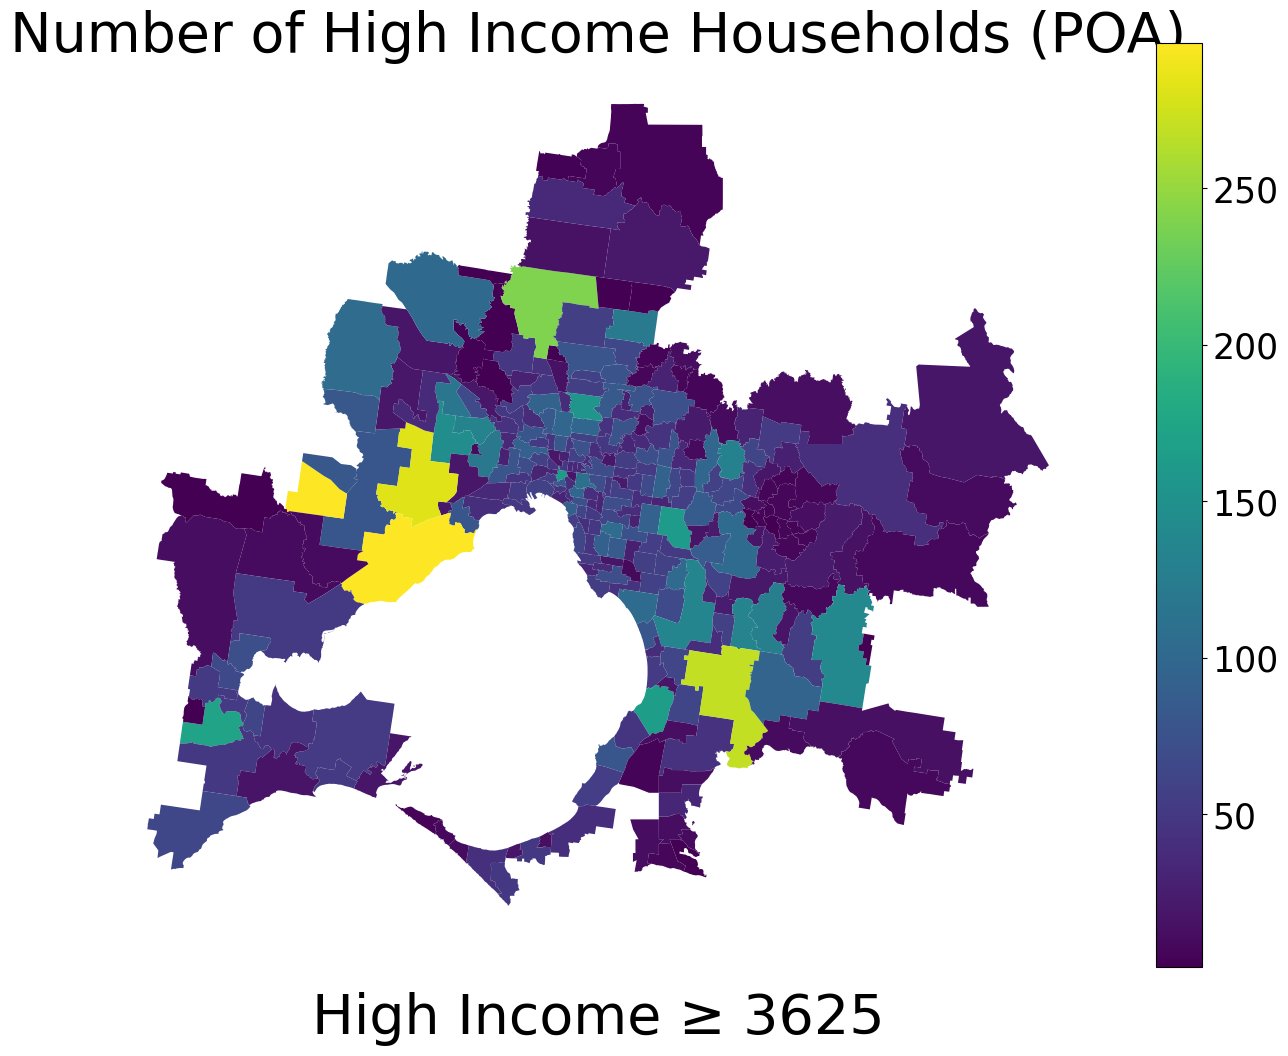

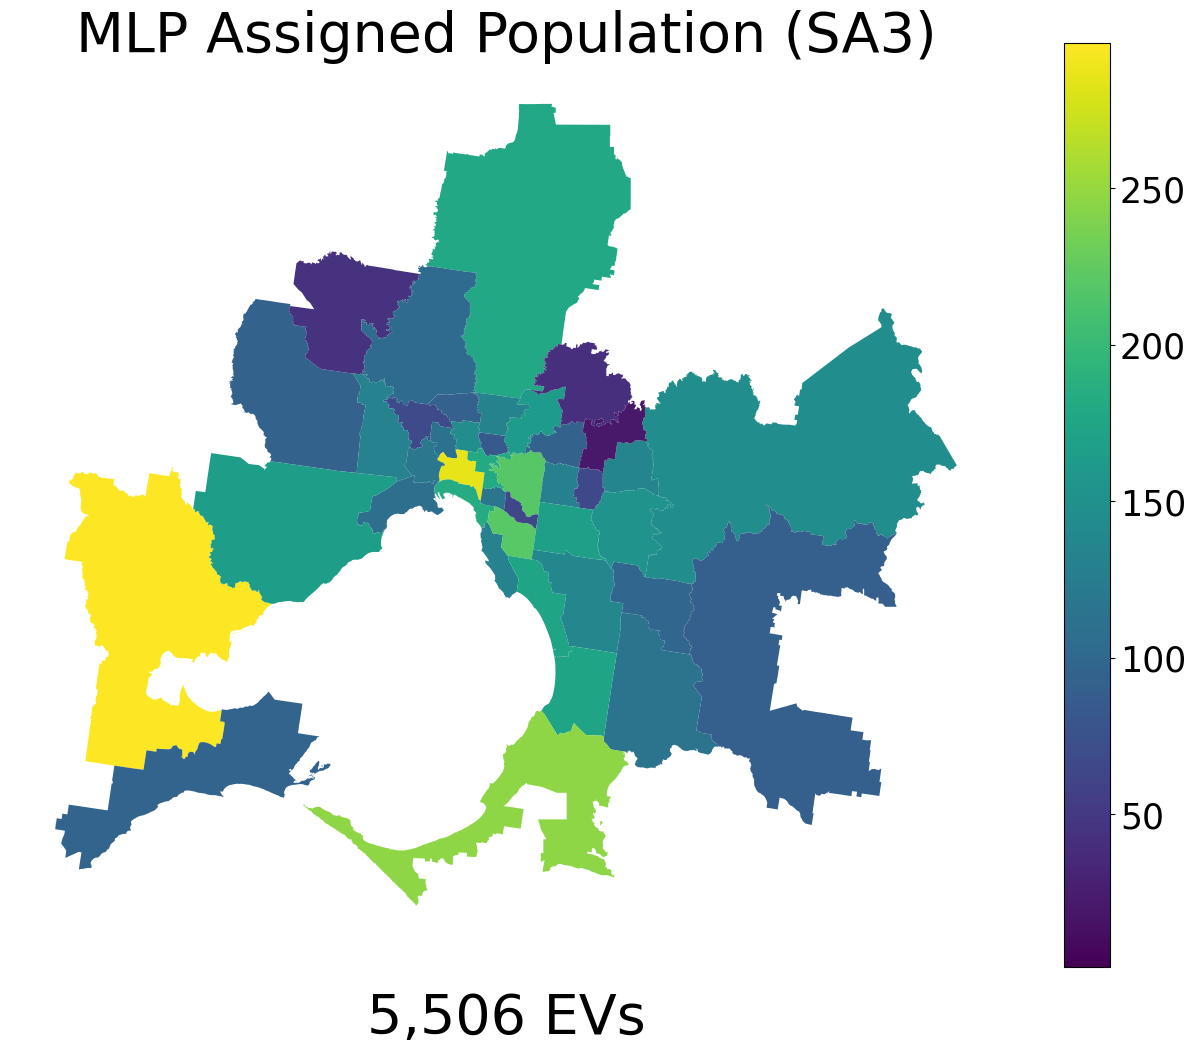

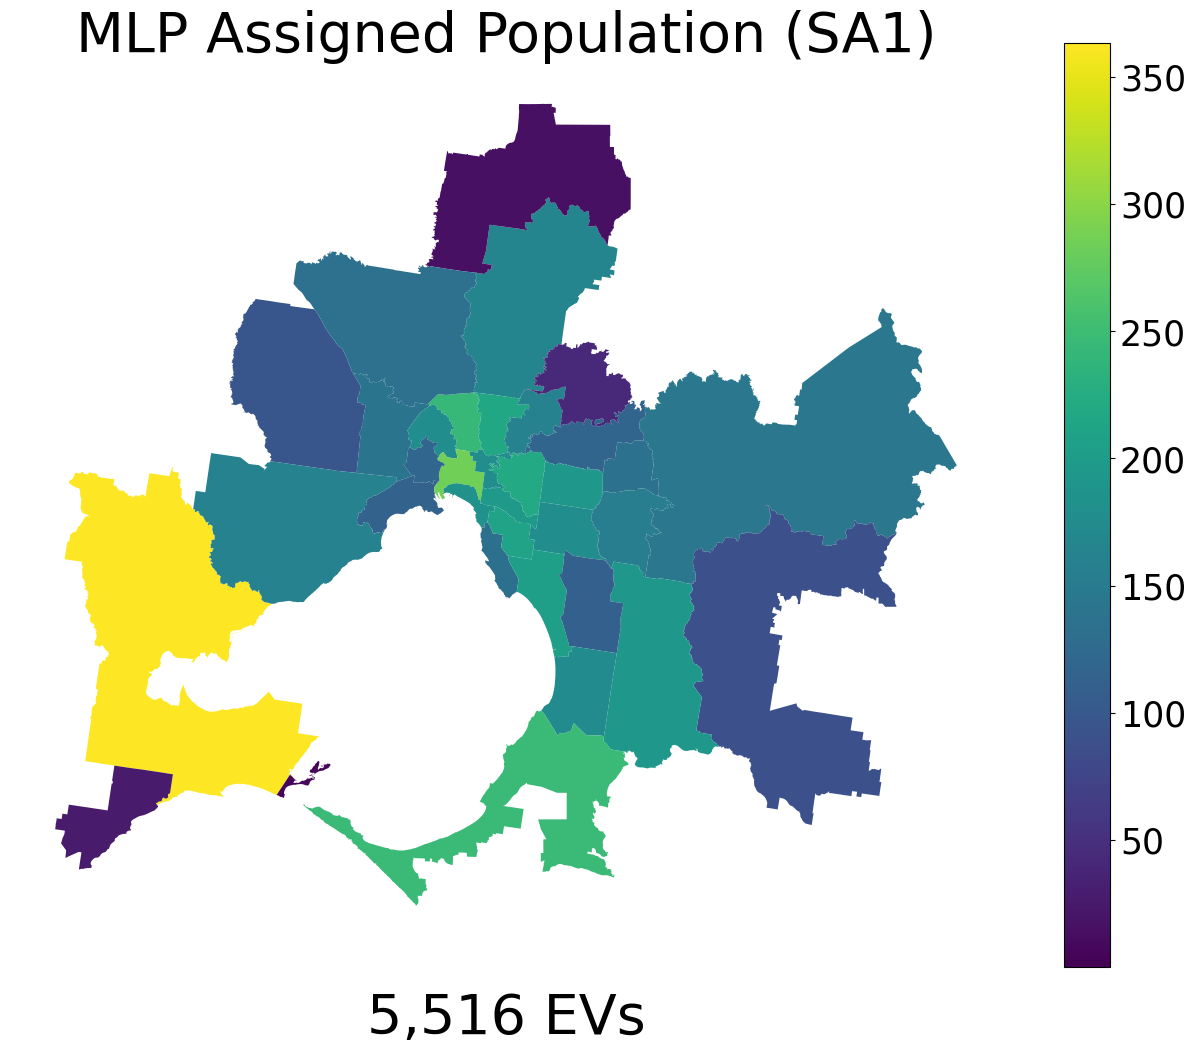

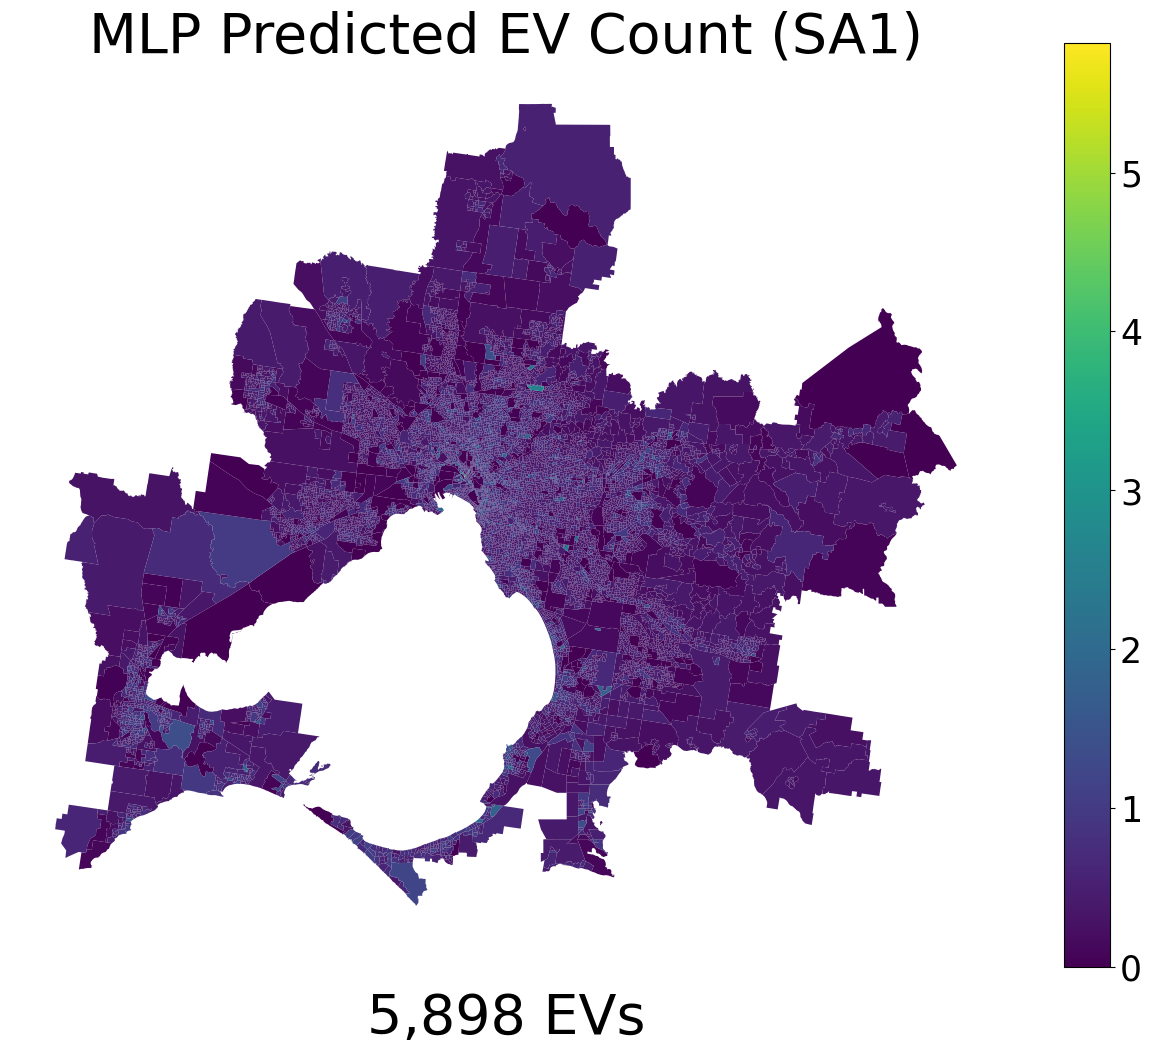

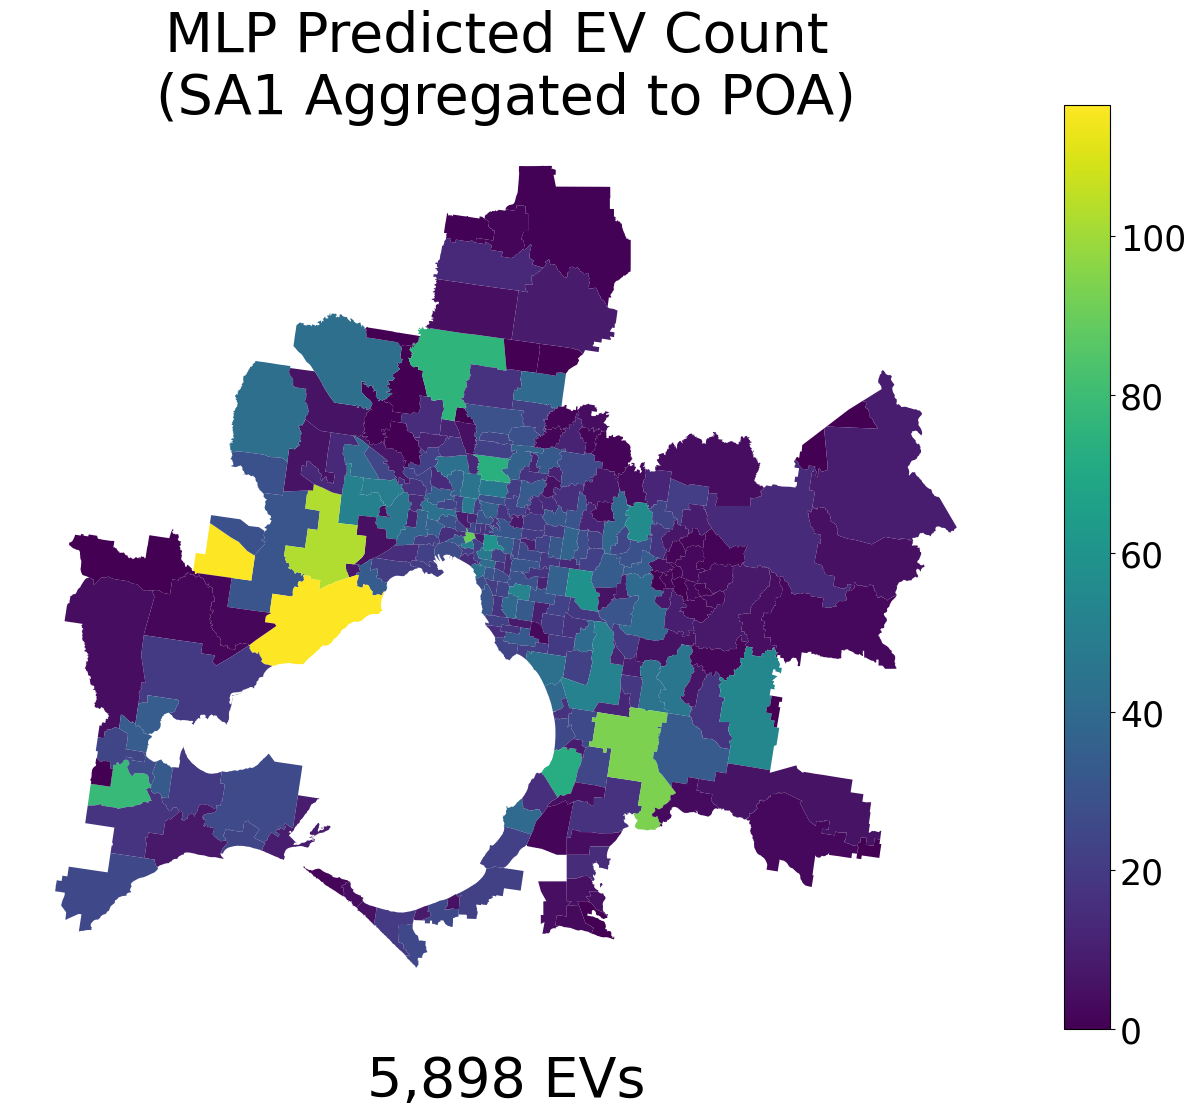

In [54]:
# Plot 6
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
high_inc_poa.plot(column="INC", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("Number of High Income Households (POA)", fontsize=title_fontsize)  
ax1.text(0.5, -0.1, f"High Income ≥ 3625", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(clipped_pred_sa3["pred_evs"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()


# Plot 6
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_sa3.plot(column="pred_evs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Assigned Population (SA3)", fontsize=title_fontsize)  
total_ev = int(clipped_pred_sa3['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(clipped_pred_sa3["pred_evs"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

# Plot 6
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_lga.plot(column="pred_evs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Assigned Population (SA1)", fontsize=title_fontsize)  
total_ev = int(clipped_pred_lga['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(clipped_pred_lga["pred_evs"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

# Plot 6
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
pred_sa1_geo.plot(column="pred_evs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Predicted EV Count (SA1)", fontsize=title_fontsize)  
total_ev = int(pred_sa1_geo['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(pred_sa1_geo["pred_evs"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_ag_poa.plot(column="pred_evs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Predicted EV Count \n(SA1 Aggregated to POA)", fontsize=title_fontsize)  
ax1.text(0.5, -0.1, f"5,898 EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(clipped_pred_ag_poa["pred_evs"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()



In [38]:
add_rows = clipped_pred_sa2[clipped_pred_sa2["SA2_CODE21"] == "210011227"][["SA2_CODE21", "pred_evs", "geometry"]]
add_rows.rename(columns={"pred_evs": "SA2_count"}, inplace=True)
add_rows.rename(columns={"SA2_CODE21": "SA2_MAIN16"}, inplace=True)
temp = clipped_kmean_sa2_pred[["SA2_MAIN16", "SA2_count", "geometry"]]
temp = pd.concat([temp, add_rows], ignore_index=True)

ValueError: Cannot determine common CRS for concatenation inputs, got ['GDA2020', 'GDA94']. Use `to_crs()` to transform geometries to the same CRS before merging.

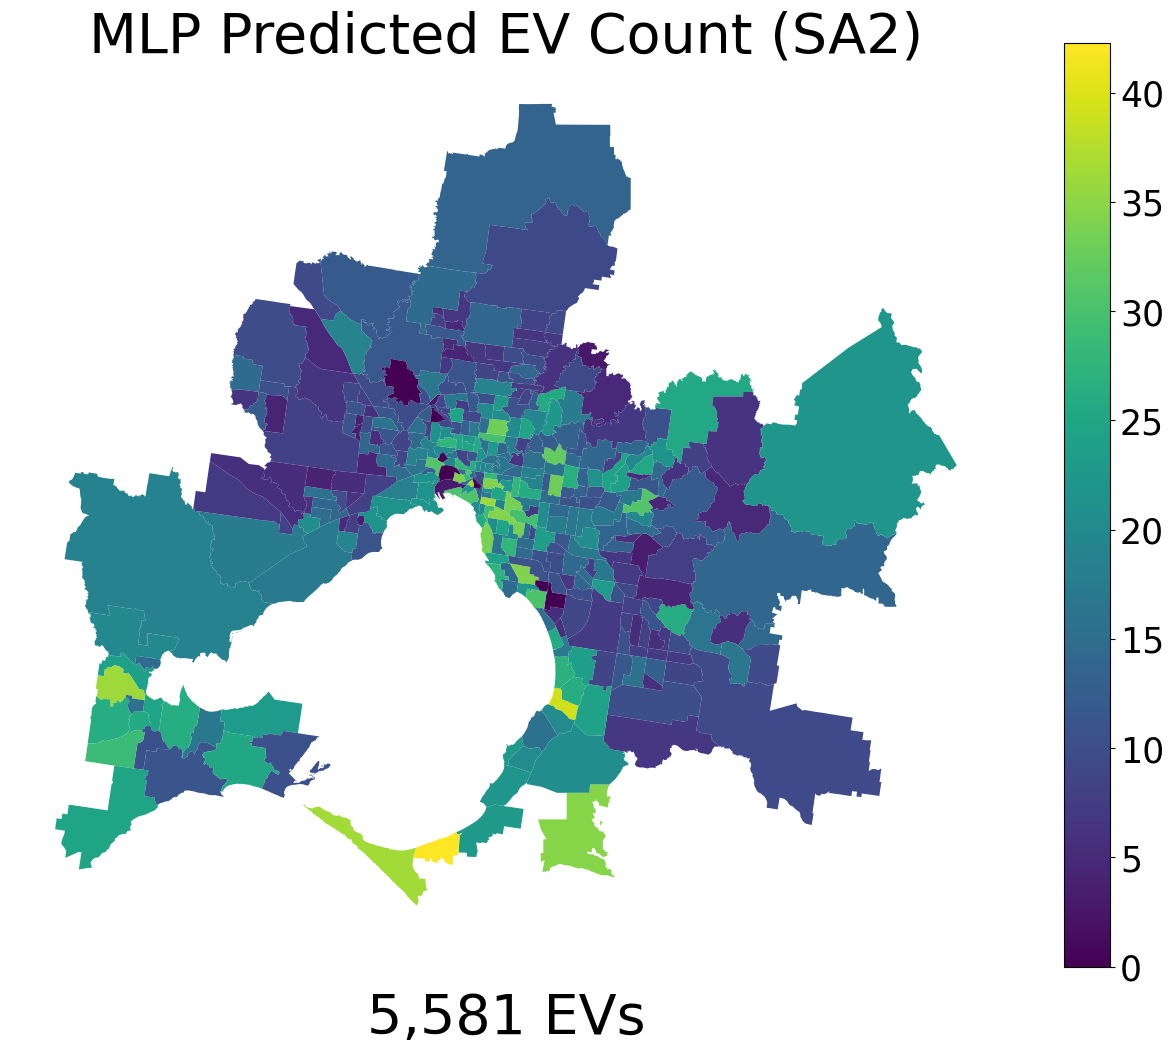

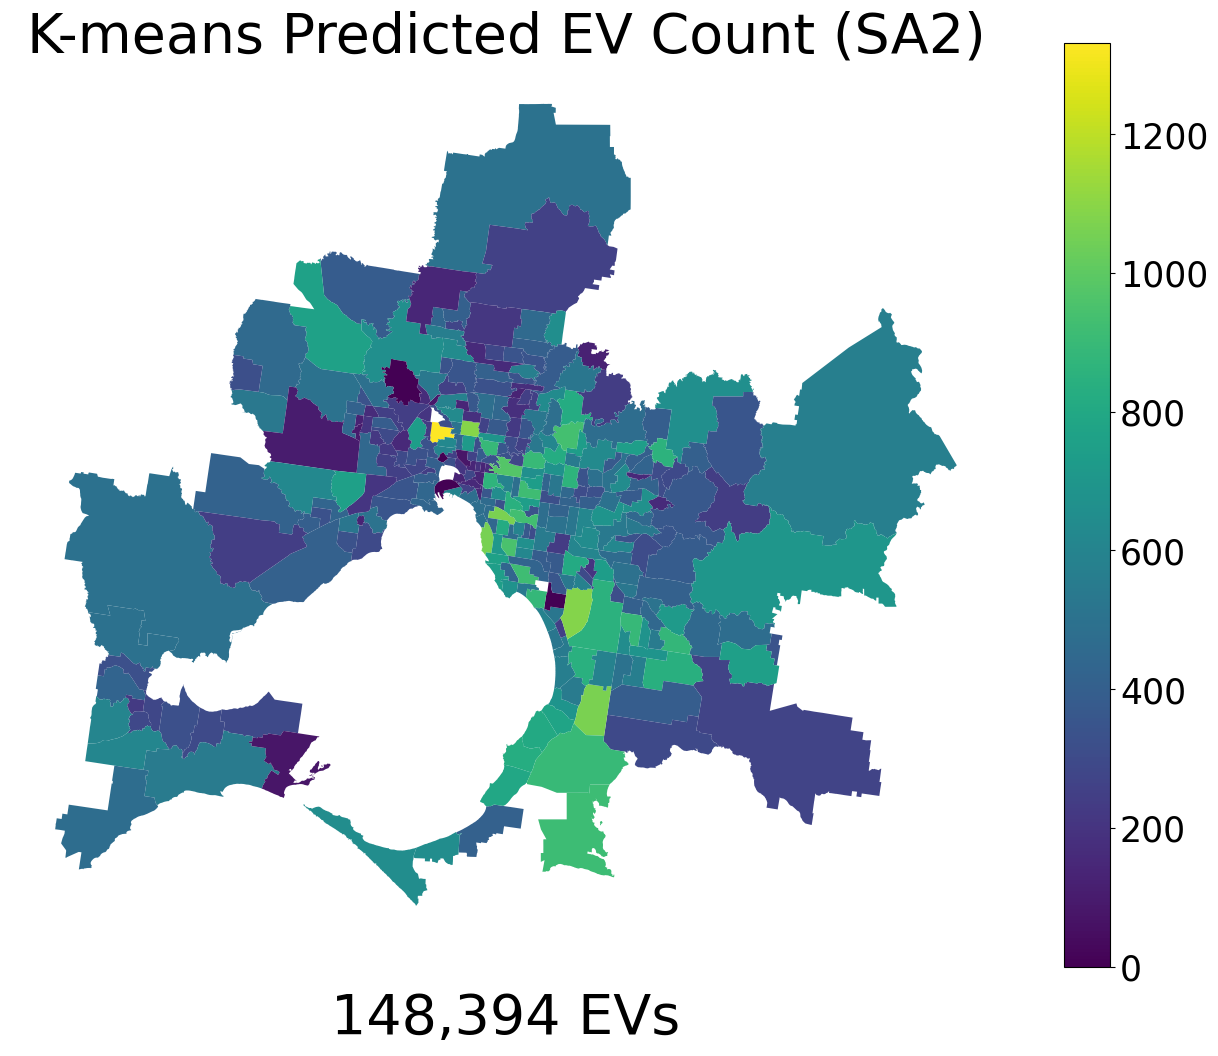

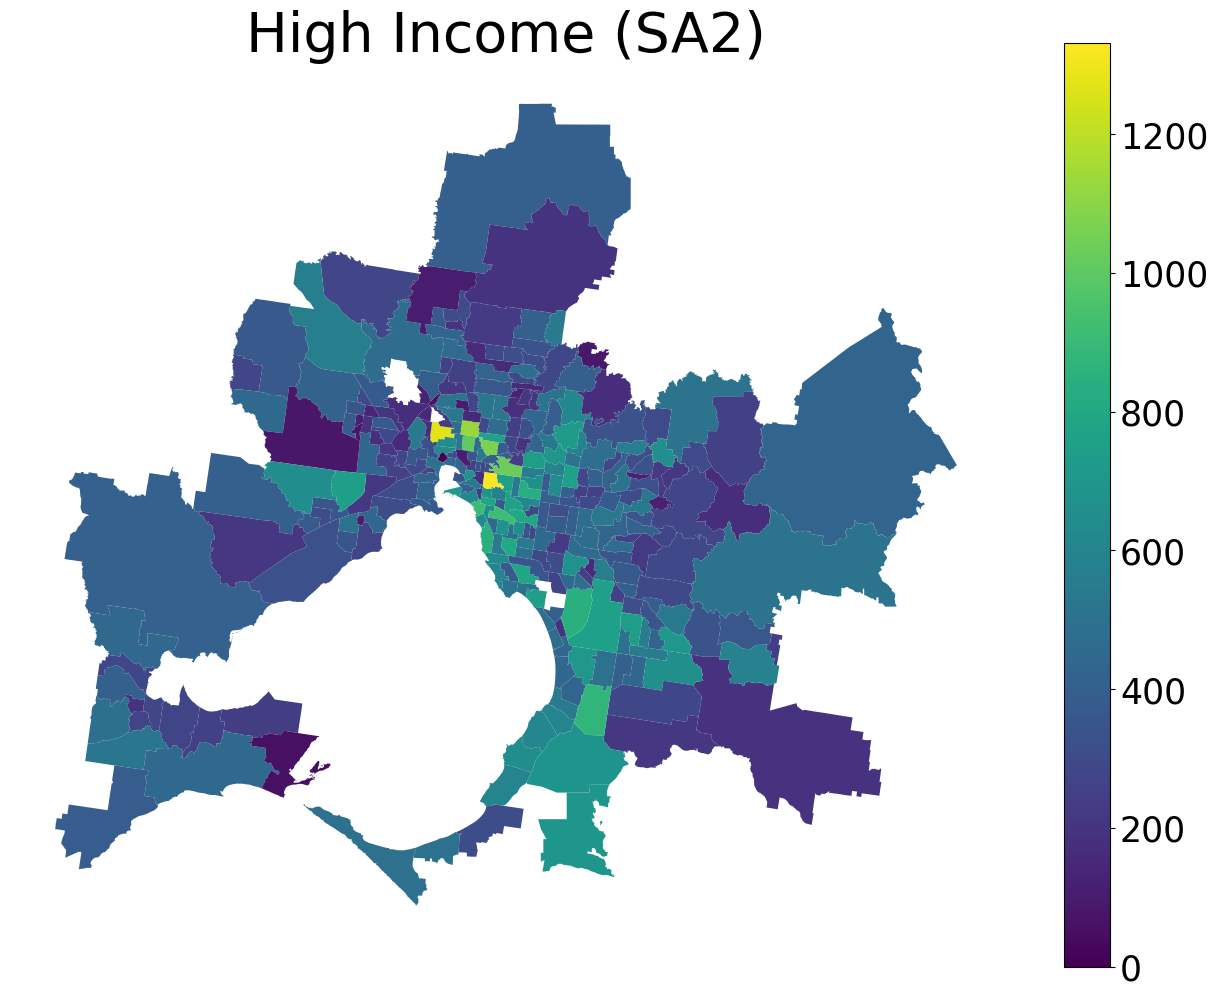

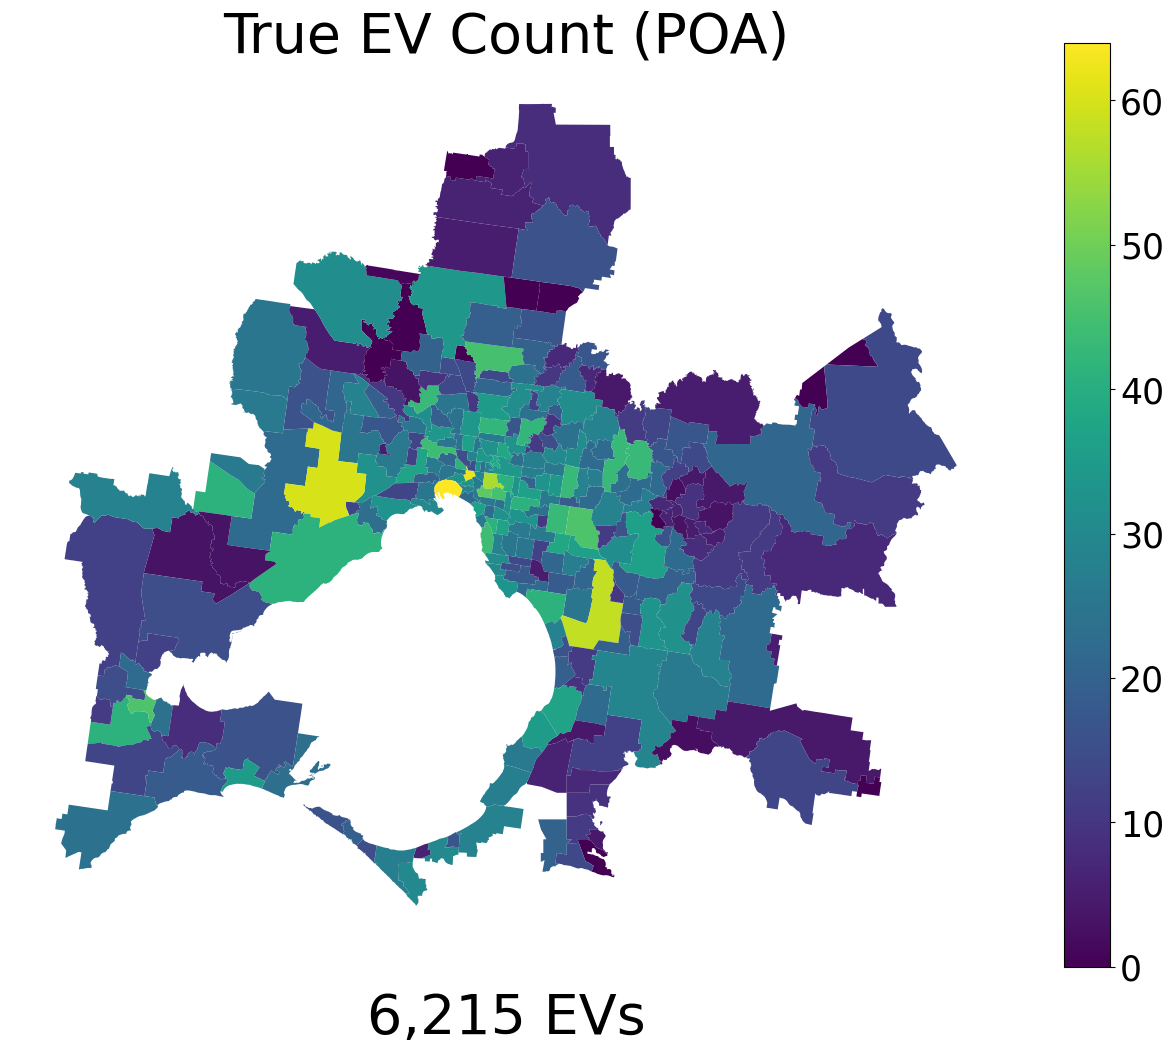

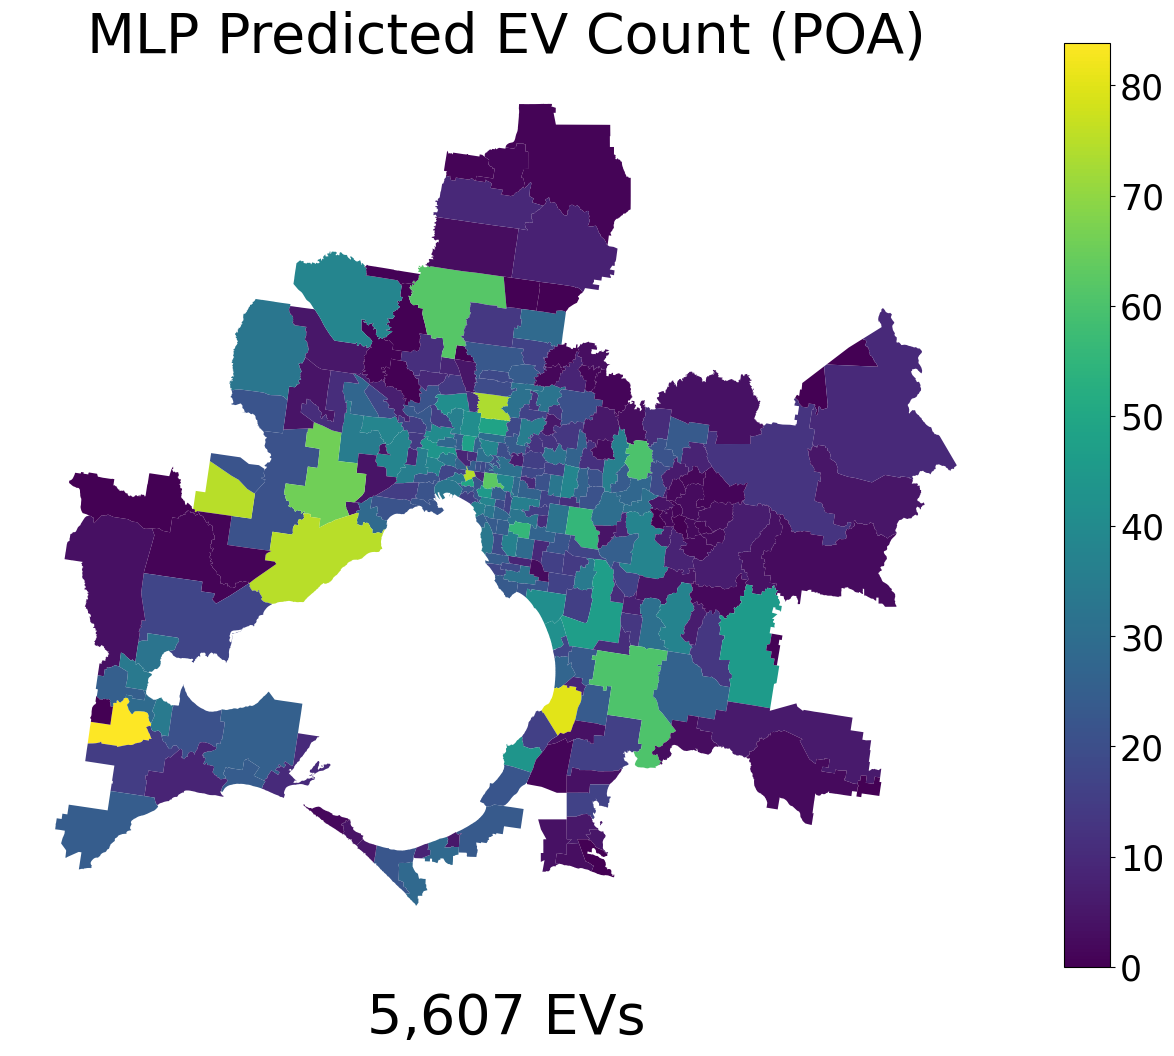

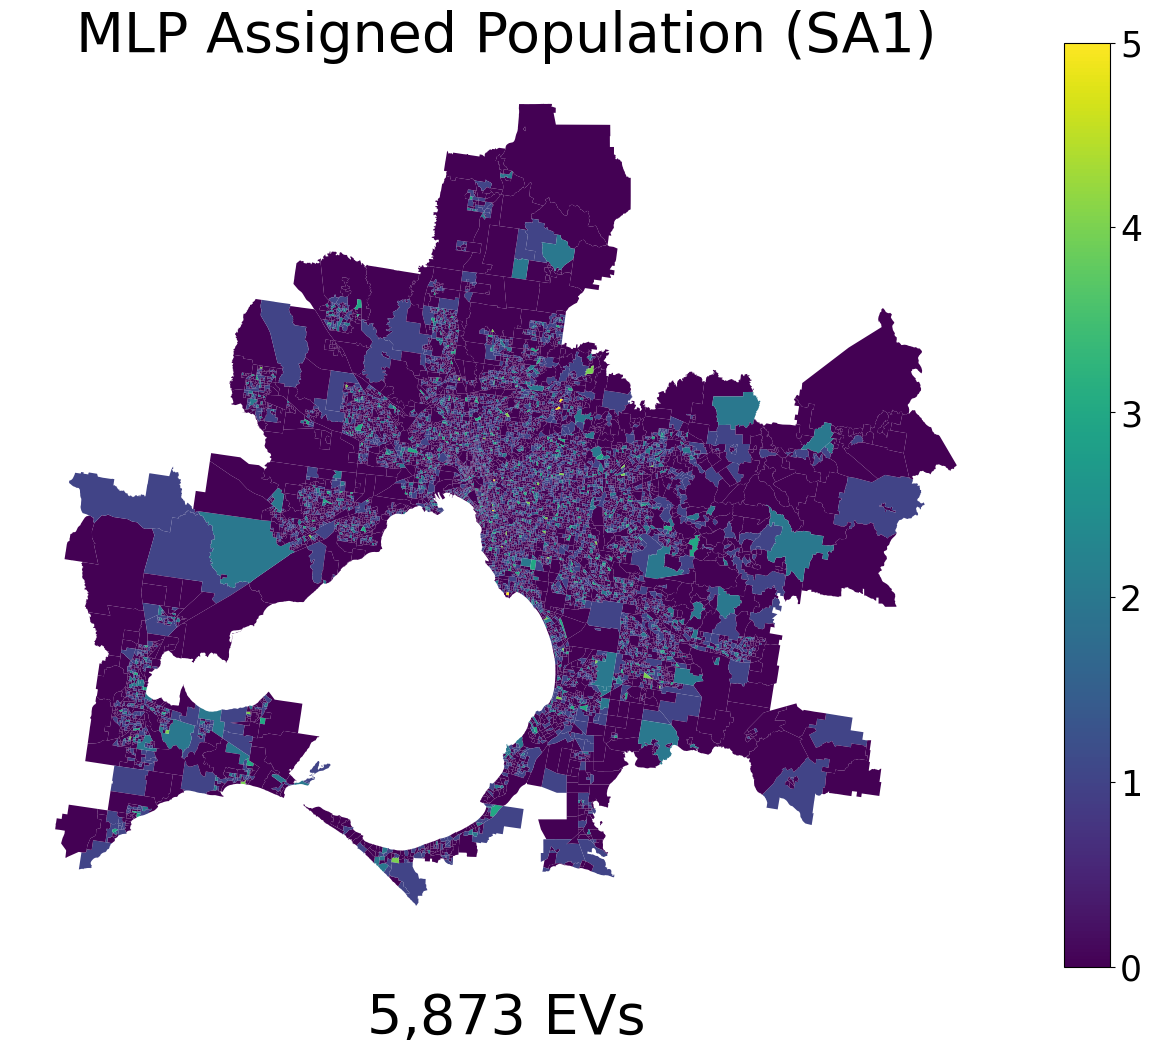

In [52]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

my_cmap = "viridis"
plot_x = 16
plot_y = 12
subtitle_fontsize = 40
title_fontsize = 40
legend_fontsize = 25

# Plot 1
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_sa2.plot(column="pred_evs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Predicted EV Count (SA2)", fontsize=title_fontsize)  
total_ev = int(clipped_pred_sa2['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm = ScalarMappable(cmap=my_cmap)
sm.set_array(clipped_pred_sa2["pred_evs"])
cbar = plt.colorbar(sm, ax=ax1)
cbar.ax.tick_params(axis='y', labelsize=legend_fontsize)

plt.show()

# Plot 2
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_kmean_sa2_pred.plot(column="EVs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(kmean_sa2_pred['EVs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.set_title("K-means Predicted EV Count (SA2)", fontsize=title_fontsize)  
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm2 = ScalarMappable(cmap=my_cmap)
sm2.set_array(clipped_kmean_sa2_pred["EVs"])
cbar2 = plt.colorbar(sm2, ax=ax1)
cbar2.ax.tick_params(axis='y', labelsize=legend_fontsize)

# Plot 2
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_kmean_high_inc.plot(column="highinccount", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("High Income (SA2)", fontsize=title_fontsize)  
ax1.axis('off')

sm2 = ScalarMappable(cmap=my_cmap)
sm2.set_array(clipped_kmean_sa2_pred["EVs"])
cbar2 = plt.colorbar(sm2, ax=ax1)
cbar2.ax.tick_params(axis='y', labelsize=legend_fontsize)

plt.show()

# Plot 3
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
true_poa_geo.plot(column="TOTAL1", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("True EV Count (POA)", fontsize=title_fontsize)  
total_ev = int(true_poa_geo['TOTAL1'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm3 = ScalarMappable(cmap=my_cmap)
sm3.set_array(true_poa_geo["TOTAL1"])
cbar3 = plt.colorbar(sm3, ax=ax1)
cbar3.ax.tick_params(axis='y', labelsize=legend_fontsize)

plt.show()

# Plot 4
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_poa.plot(column="pred_evs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Predicted EV Count (POA)", fontsize=title_fontsize)  
total_ev = int(clipped_pred_poa['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm4 = ScalarMappable(cmap=my_cmap)
sm4.set_array(clipped_pred_poa["pred_evs"])
cbar4 = plt.colorbar(sm4, ax=ax1)
cbar4.ax.tick_params(axis='y', labelsize=legend_fontsize)

plt.show()

# Plot 5
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
assigned_int_ev_pred.plot(column="assign_ev", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Assigned Population (SA1)", fontsize=title_fontsize)  
total_ev = int(assigned_int_ev_pred['assign_ev'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(assigned_int_ev_pred["assign_ev"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()




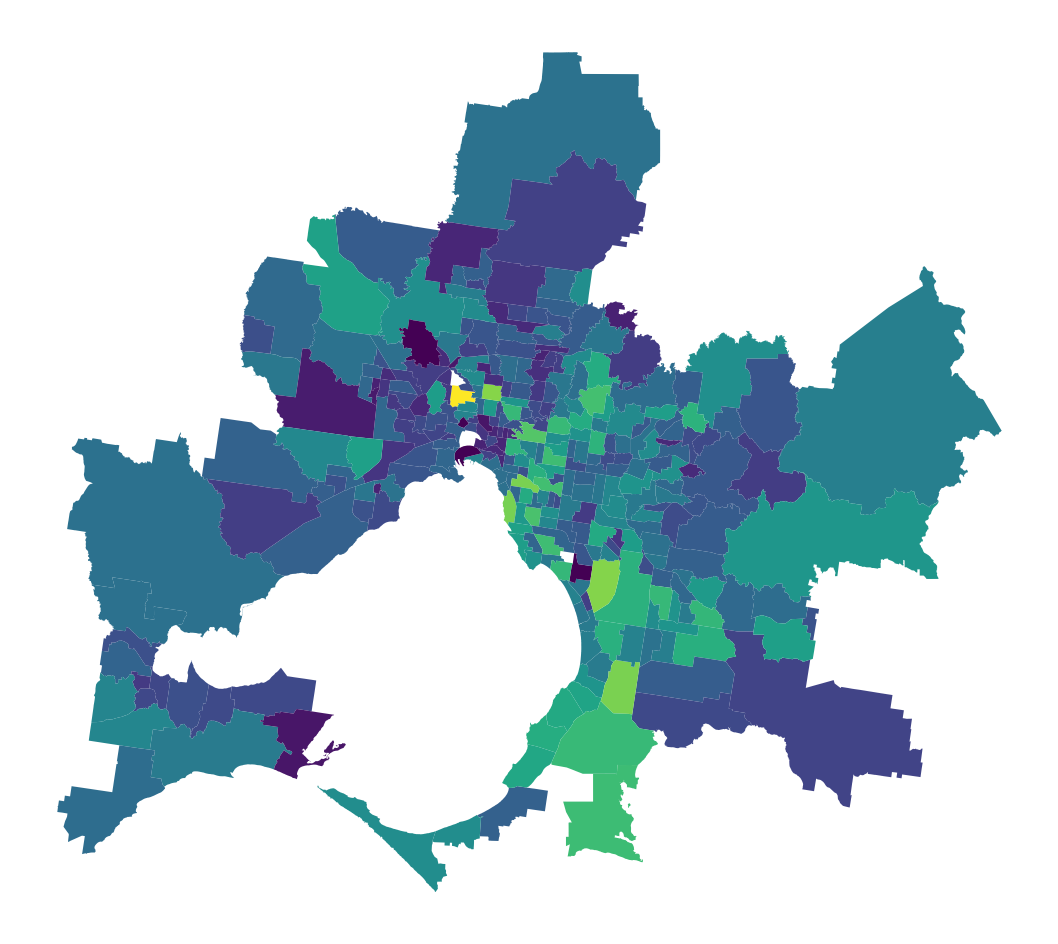

In [14]:
# Plot 2
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_kmean_sa2_pred.plot(column="EVs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(kmean_sa2_pred['EVs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.axis('off')
plt.show()

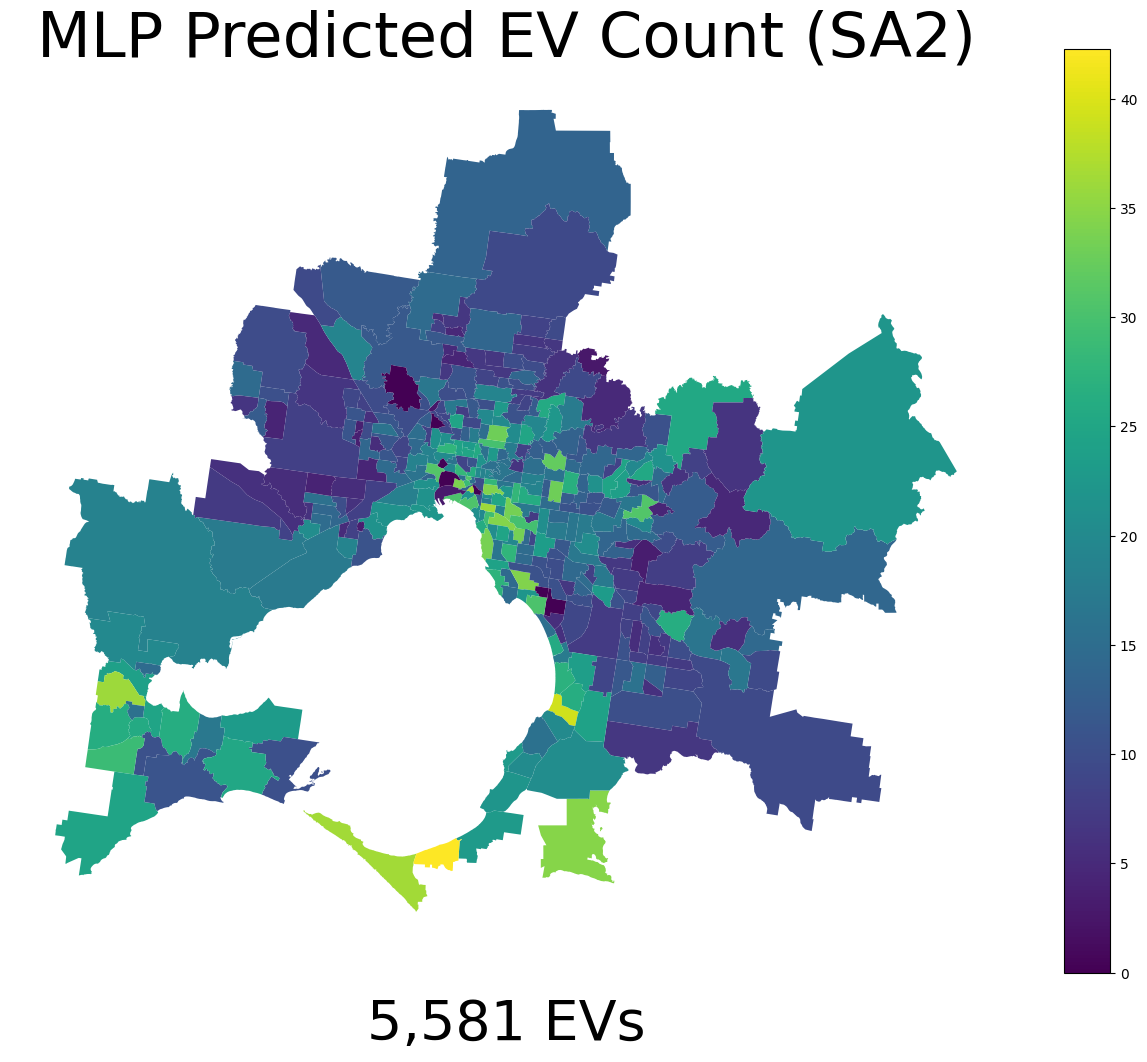

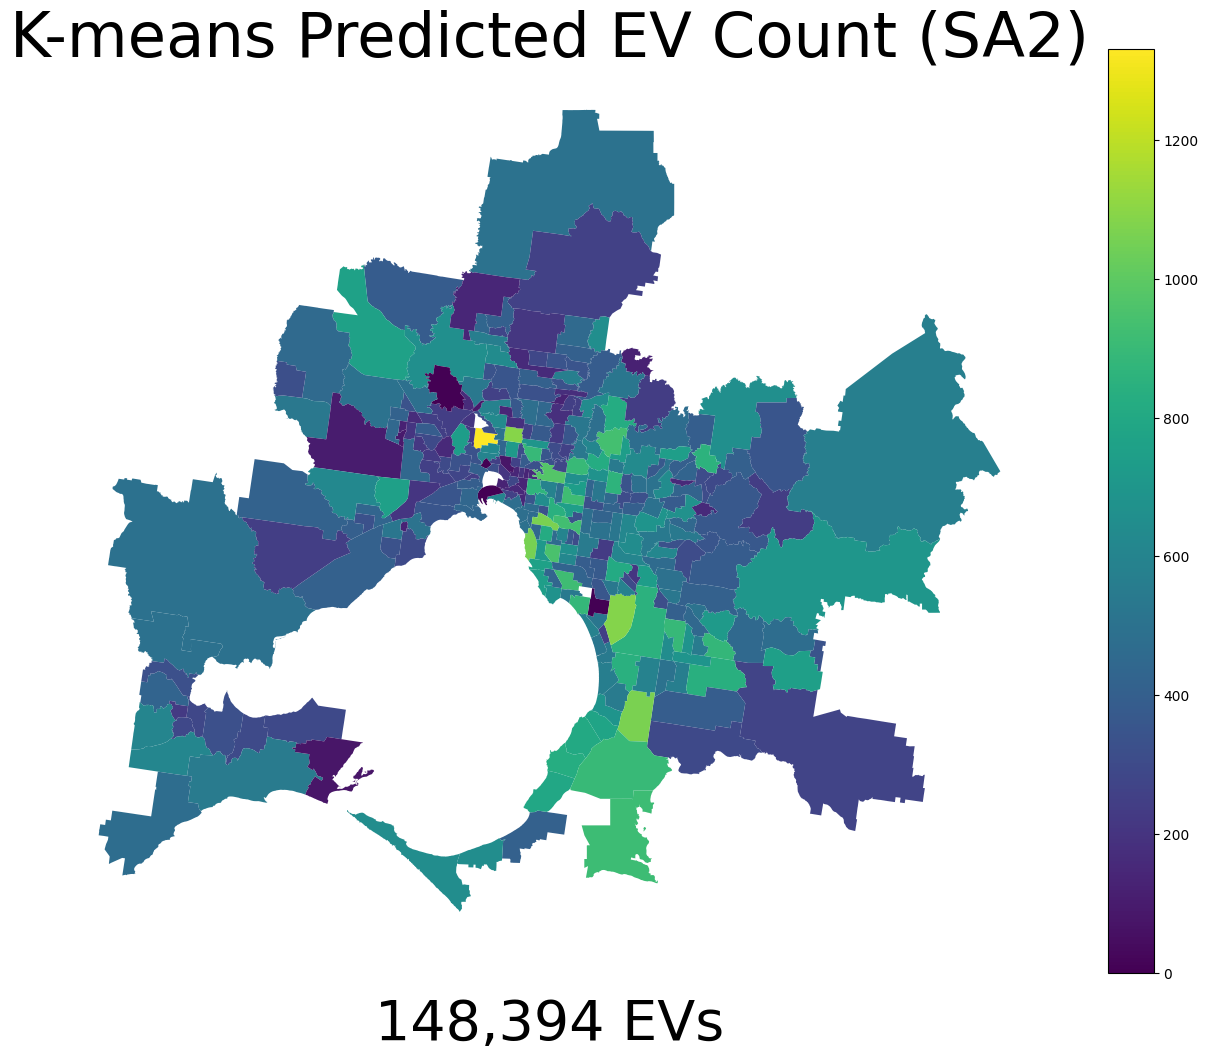

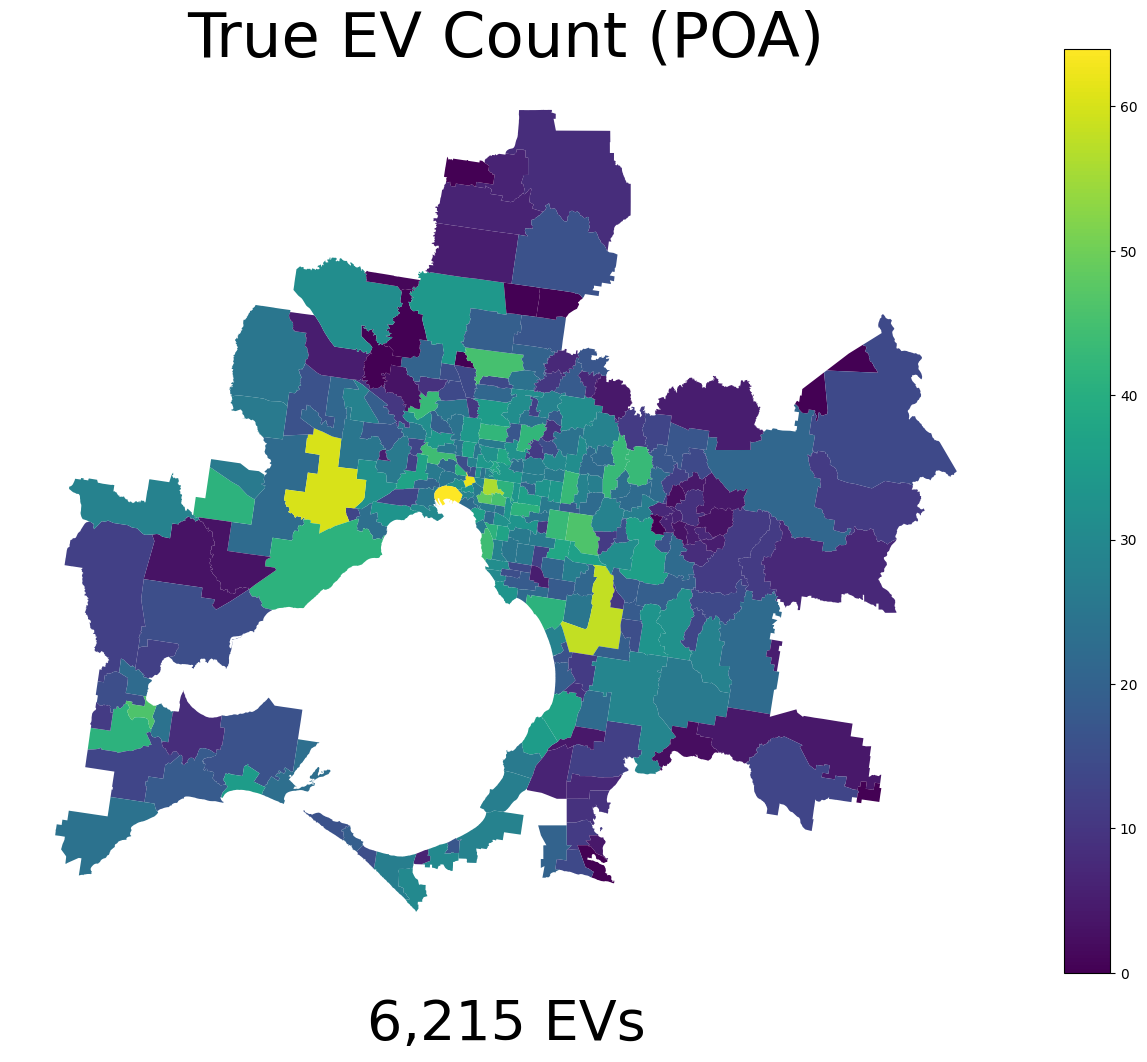

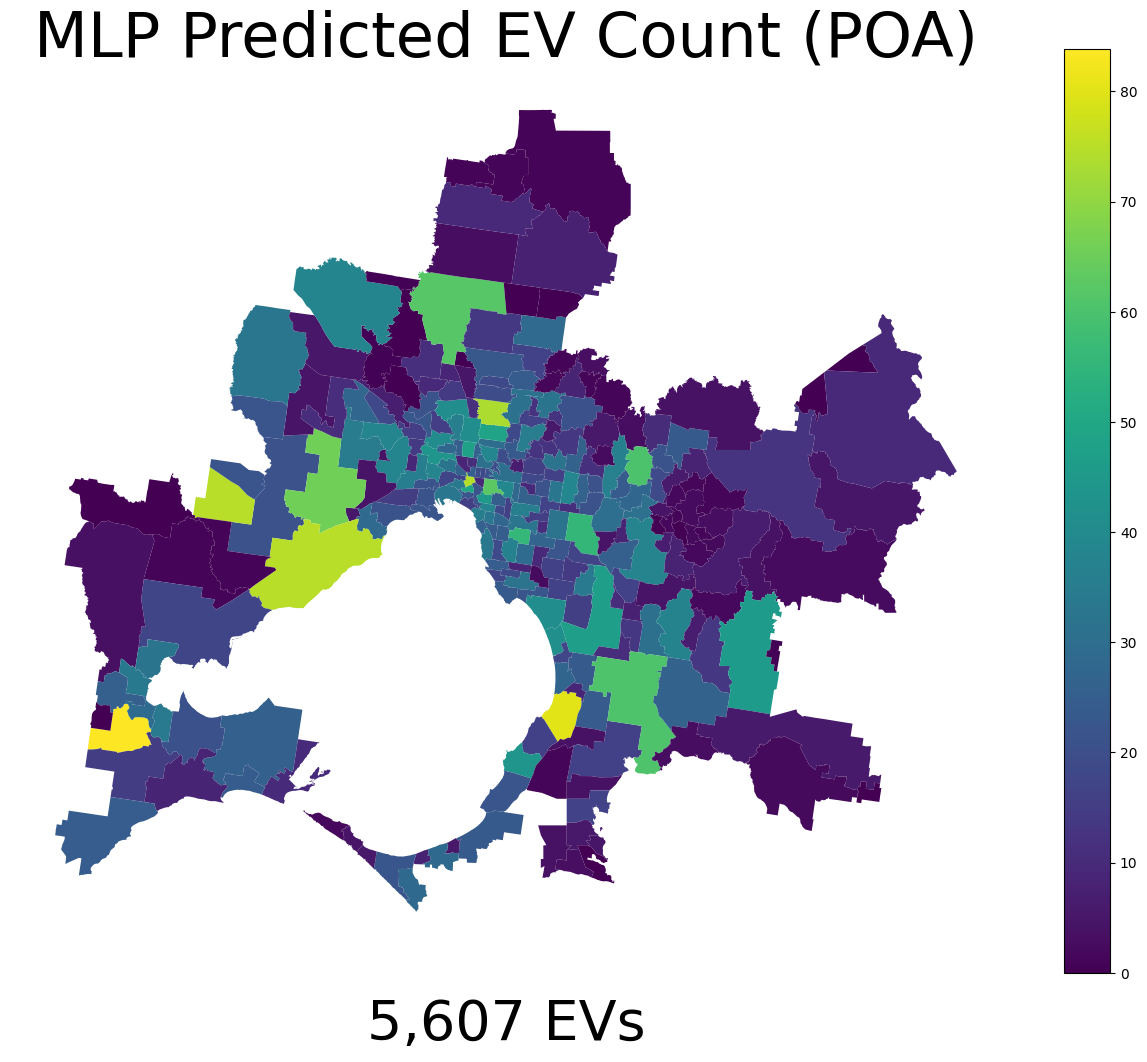

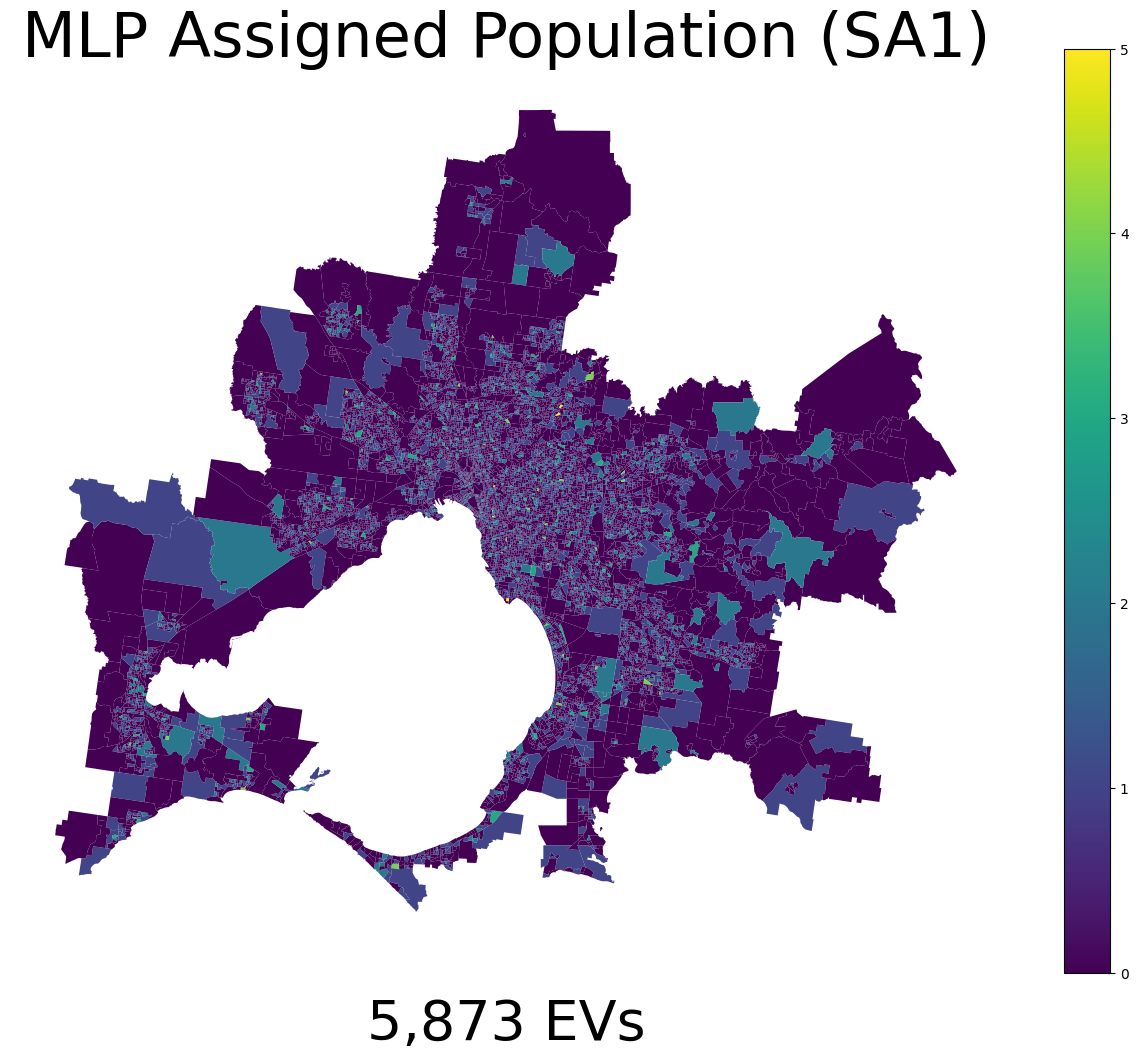

In [10]:
# Plot 1
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_sa2.plot(column="pred_evs", cmap=my_cmap, legend=True, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Predicted EV Count (SA2)", fontsize=title_fontsize)  
total_ev = int(clipped_pred_sa2['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle=
ax1.axis('off')
plt.show()

# Plot 2
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_kmean_sa2_pred.plot(column="EVs", cmap=my_cmap, legend=True, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(kmean_sa2_pred['EVs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.set_title("K-means Predicted EV Count (SA2)", fontsize=title_fontsize)  
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle=
ax1.axis('off')
plt.show()

# Plot 3
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
true_poa_geo.plot(column="TOTAL1", cmap=my_cmap, legend=True, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("True EV Count (POA)", fontsize=title_fontsize)  # Set the title
total_ev = int(true_poa_geo['TOTAL1'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle=
ax1.axis('off')
plt.show()

# Plot 4
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
clipped_pred_poa.plot(column="pred_evs", cmap=my_cmap, legend=True, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Predicted EV Count (POA)", fontsize=title_fontsize)  # Set the title
total_ev = int(clipped_pred_poa['pred_evs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle=
ax1.axis('off')
plt.show()

# Plot 5
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
assigned_int_ev_pred.plot(column="assign_ev", cmap=my_cmap, legend=True, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("MLP Assigned Population (SA1)", fontsize=title_fontsize)  # Set the title
total_ev = int(assigned_int_ev_pred['assign_ev'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle=
ax1.axis('off')
plt.show()


In [11]:
clipped_kmean_sa2_pred['EVs'].sum() / 6128

24.201207571801568

In [12]:
clipped_kmean_sa2_pred['EVs'].sum()  / 3157081 *100

4.697535476600062

In [13]:
plt.figure(figsize=plot_size)
ax1 = clipped_kmean_sa2_pred.plot(column="EVs", cmap='viridis', legend=True)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("K-means Predicted EV Count (SA2)")  # Set the title
# ax1.text(0.5, -0.1, f"{int(clipped_kmean_sa2_pred['EVs'].sum())} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle=
ax1.axis('off')
plt.show()

plt.figure(figsize=plot_size)
ax1 = clipped_kmean_high_inc.plot(column="highinccount", cmap='viridis', legend=True)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("K-means Predicted EV Count (SA2)")  # Set the title
# ax1.text(0.5, -0.1, f"${int(clipped_kmean_high_inc['highinccount'].median())} Median", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center')  # Add subtitle
ax1.set_title("K-means Predicted High Income Count (SA2)")  # Set the title
ax1.axis('off')
plt.show()

NameError: name 'plot_size' is not defined